Data shape: (7032, 31)
X dtype: float64
X shape: (7032, 30)
y shape: (7032,)
Train size: 5625 Test size: 1407
Perceptron Test Accuracy: 0.7669


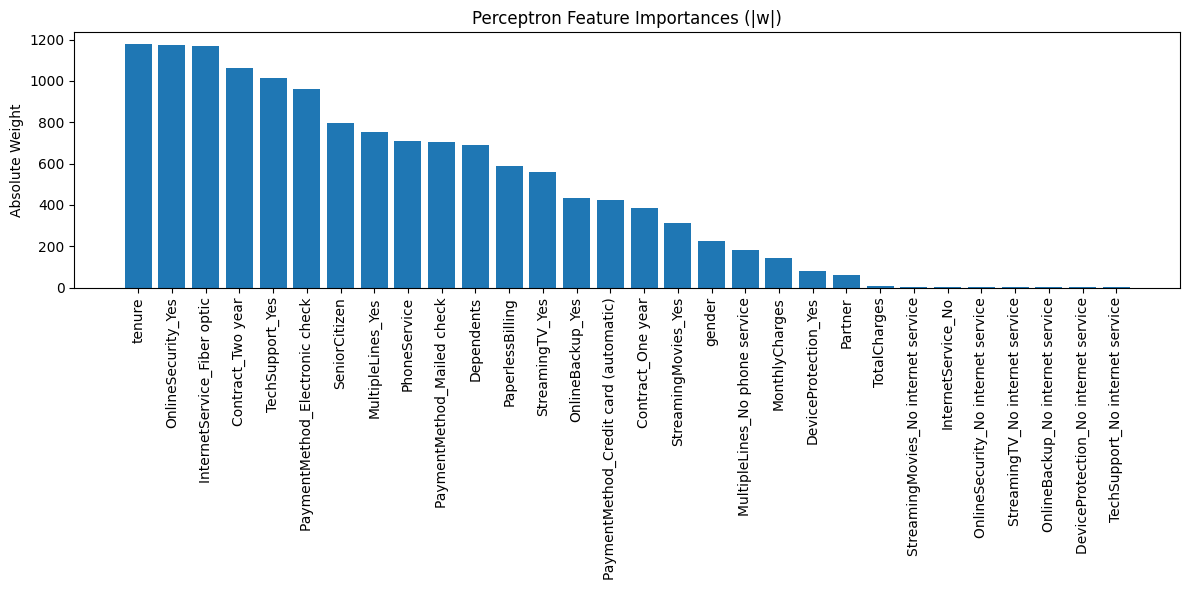

In [16]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load clean telco churn data
df = pd.read_csv('/Users/limengfeiyang/CMOR438-final-project/data/telco_churn_clean.csv')  
print("Data shape:", df.shape)


# Prepare features X and target y

# Drop the Churn column and convert every remaining column to float
X = df.drop('Churn', axis=1).astype(float).values   
# now dtype=float64, shape (7032, 30)

# Map 0-> –1, 1-> +1 for the Perceptron
y = df['Churn'].map({0: -1, 1: 1}).values

print("X dtype:", X.dtype)
print("X shape:", X.shape)
print("y shape:", y.shape)



# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


# Perceptron Implementation
class Perceptron:
    def __init__(self, lr: float = 0.01, n_iters: int = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=float)
        self.b = 0.0

        for epoch in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.w) + self.b
                y_pred = np.sign(linear_output)
                if y_pred == 0:
                    y_pred = 1

                # update on misclassification
                if y[idx] * linear_output <= 0:
                    update = self.lr * y[idx]
                    self.w += update * x_i
                    self.b += update
                    errors += 1

            # stop early if perfect separation
            if errors == 0:
                print(f"Converged after {epoch+1} epochs.")
                break

    def predict(self, X: np.ndarray) -> np.ndarray:
        linear_output = np.dot(X, self.w) + self.b
        return np.where(linear_output >= 0, 1, -1)

        
# Train & Evaluate
perceptron = Perceptron(lr=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Perceptron Test Accuracy: {acc:.4f}")



# Feature‐weight magnitudes 
# Shows which features (of 30) have the biggest impact.

import numpy as np
import matplotlib.pyplot as plt

feature_names = df.drop('Churn', axis=1).columns.to_list()
weights = perceptron.w
abs_weights = np.abs(weights)

# sort by descending magnitude
idx_sorted = np.argsort(abs_weights)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(
    np.arange(len(weights)),
    abs_weights[idx_sorted]
)
plt.xticks(
    np.arange(len(weights)),
    [feature_names[i] for i in idx_sorted],
    rotation=90
)
plt.title("Perceptron Feature Importances (|w|)")
plt.ylabel("Absolute Weight")
plt.tight_layout()
plt.show()
